## Manahil Fatima Anwar
## 20K-0134
## BAI-7A
## CV Lab 08 - Lab Tasks

### Task 01

In [4]:
# First ran it for train01.mp4 and then for train02.mp4
import cv2
import numpy as np

name = input("Enter your name: ")
num = 300  # Number of frames to be taken
face_data = []

# Init Camera
cap = cv2.VideoCapture("train02.mp4")  # Video location or 0 for video stream from webcam

# Instantiate the cascade_classifier with file name
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")
while num > 0:
    ret, frame = cap.read()

    if not ret:
        print("Error reading frame. Skipping...")
        continue

    # Find all the faces in the frame
    faces = face_cascade.detectMultiScale(frame, 1.3, 5)  # Frame, scaling factor, neighbors
    faces = sorted(faces, key=lambda x: x[2] * x[3], reverse=True)
    faces = faces[:1]
    for (x, y, w, h) in faces:
        face_selection = frame[y:y + h, x:x + w]  # Area of interest
        cv2.imshow("Face_selection", face_selection)
        face_selection = cv2.resize(face_selection, (100, 100))
        print(face_selection.shape)
        face_data.append(face_selection)

        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 3)  # Frame, start pos, end pos, color, thickness

        num -= 1

    cv2.imshow("Video frame", frame)

    # Wait for user to stop
    key_pressed = cv2.waitKey(1) & 0xFF
    if key_pressed == ord('q'):
        break

face_data = np.array(face_data)
print(face_data.shape)

# Convert face list array into numpy array
face_data = face_data.reshape((face_data.shape[0], -1))
print(face_data.shape)
np.save(name, face_data)

cap.release()
cv2.destroyAllWindows()


Enter your name: manahil
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100

In [4]:
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [5]:
files = [faces for faces in  os.listdir('datasets') if faces.endswith('.npy') ]
names = [faces[:-4] for faces in files]
label_encoder = LabelEncoder()
names = label_encoder.fit_transform(names)

print(names)

face_data = []

for filename in files:
    data = np.load('datasets/' + filename)
    print(data.shape)
    face_data.append(data)

face_data=np.array(face_data)
print(face_data.shape)
print(names)
face_data = np.concatenate(face_data ,axis = 0)
print(face_data.shape)
names = np.repeat(names ,300)
print(names.shape)
names = names.reshape((names.shape[0],1))
print(names.shape)
# dataset = np.hstack((face_data, names))
dataset = np.hstack((face_data, names.reshape(-1, 1)))
print(dataset.shape)

[0 1]
(300, 30000)
(300, 30000)
(2, 300, 30000)
[0 1]
(600, 30000)
(600,)
(600, 1)
(600, 30001)


In [6]:
face_pred=KNeighborsClassifier()

In [7]:
face_pred.fit(dataset[:, :-1], dataset[:, -1])

KNeighborsClassifier()

In [13]:
cap = cv2.VideoCapture('test.mp4')  # video location or 0 for video stream from webcam
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

while True:
    ret, frame = cap.read()  # Status, Frame
    if not ret:
        break  # Break the loop when there are no more frames

    # Find All the faces in the frame
    faces = face_cascade.detectMultiScale(frame, 1.3, 5)  # Frame, scaling factor, neighbors

    for face in faces:
        x, y, w, h = face
        face_selection = frame[y:y + h, x:x + w]
        face_selection = cv2.resize(face_selection, (100, 100))
        face_cropped = face_selection.reshape((1, -1))

        # pred = face_pred.predict(face_cropped)
        pred = face_pred.predict(face_cropped)
        pred = label_encoder.inverse_transform(pred)

        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 5)  # Frame, start pos, end pos, color, thickness
        cv2.putText(frame, pred[0], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    cv2.imshow("Feed", frame)

    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break  # Break the loop if 'q' is pressed

cap.release()
cv2.destroyAllWindows()


### Task 02

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [2]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/80/6f/57d36f6507e432d7fc1956b2e9e8530c5c2d2bfcd8821bcbfae271cd6688/tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.14.0 from https://files.pythonhosted.org/packages/ad/6e/1bfe367855dd87467564f7bf9fa14f3b17889988e79598bc37bf18f5ffb6/tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  

In [2]:
X_train = np.loadtxt(r'C:\Users\ABC\Desktop\BAI\BAI-S7\CV Lab\Lab 08\Lab -08\input.csv', delimiter = ',')
Y_train = np.loadtxt(r'C:\Users\ABC\Desktop\BAI\BAI-S7\CV Lab\Lab 08\Lab -08\labels.csv', delimiter = ',')
X_test = np.loadtxt(r'C:\Users\ABC\Desktop\BAI\BAI-S7\CV Lab\Lab 08\Lab -08\input_test.csv', delimiter = ',')
Y_test = np.loadtxt(r'C:\Users\ABC\Desktop\BAI\BAI-S7\CV Lab\Lab 08\Lab -08\labels_test.csv', delimiter = ',')

In [3]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [4]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


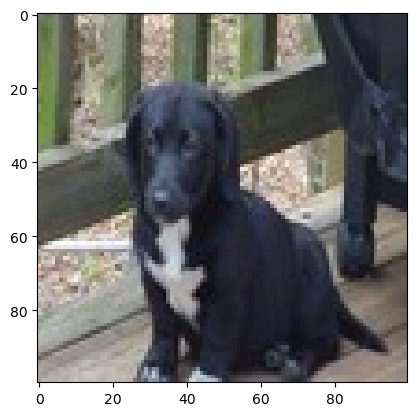

In [5]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [7]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [8]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [9]:
model.fit(X_train, Y_train, epochs = 10, batch_size = 64)

Epoch 1/10
32/32 [==============================] - 15s 429ms/step - loss: 0.7481 - accuracy: 0.4985
Epoch 2/10
32/32 [==============================] - 15s 453ms/step - loss: 0.6932 - accuracy: 0.5010
Epoch 3/10
32/32 [==============================] - 15s 461ms/step - loss: 0.6931 - accuracy: 0.5010
Epoch 4/10
32/32 [==============================] - 15s 465ms/step - loss: 0.6923 - accuracy: 0.5335
Epoch 5/10
32/32 [==============================] - 18s 566ms/step - loss: 0.6797 - accuracy: 0.5820
Epoch 6/10
32/32 [==============================] - 16s 504ms/step - loss: 0.6629 - accuracy: 0.6115
Epoch 7/10
32/32 [==============================] - 16s 498ms/step - loss: 0.6272 - accuracy: 0.6560
Epoch 8/10
32/32 [==============================] - 16s 512ms/step - loss: 0.5712 - accuracy: 0.7065
Epoch 9/10
32/32 [==============================] - 16s 508ms/step - loss: 0.5181 - accuracy: 0.7405
Epoch 10/10
32/32 [==============================] - 15s 467ms/step - loss: 0.4436 - accura

In [10]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 54ms/step - loss: 0.6335 - accuracy: 0.6925


[0.6335276961326599, 0.6924999952316284]

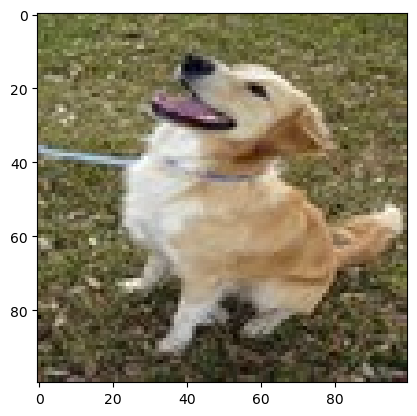

1/1 [==============================] - 0s 408ms/step
Our model says it is a : dog


In [11]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)